In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
#Googleドライブにマウントし、ファイルへアクセス
from google.colab import drive
drive.mount('/content/drive')

# 変数にパスを代入
csv_file = 'drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv'

#データの読み込み、確認
df = pd.read_csv(csv_file)
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape#列数、行数を調べる→12列5110行(12項目5110人)
print(df.index)#インデックスの参照
print(df.columns)#列名の参照

RangeIndex(start=0, stop=5110, step=1)
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
#列名を変更
columns = [
    'id',
    '性別',
    '年齢',
    '高血圧',
    '心臓病',
    '既婚',
    '職業',
    '住居地域',
    '血糖値',
    'BMI',
    '喫煙',
    '脳卒中'
]

df.columns = columns

df#表示


,id,性別,年齢,高血圧,心臓病,既婚,職業,住居地域,血糖値,BMI,喫煙,脳卒中
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.drop('id',axis=1)#idをカラムから削除

,性別,年齢,高血圧,心臓病,既婚,職業,住居地域,血糖値,BMI,喫煙,脳卒中
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# 欠損値の確認
df.isnull().any(axis=0)
# 欠損値がいくつあるか→BMIのみが201個
df.isnull().sum()


id        0
性別        0
年齢        0
高血圧       0
心臓病       0
既婚        0
職業        0
住居地域      0
血糖値       0
BMI     201
喫煙        0
脳卒中       0
dtype: int64

In [ ]:
# 欠損値を平均で補完
df2 = df.fillna(df.mean())
#欠損値の確認
missing_values = df2.isnull().any(axis=0)
print(missing_values)

id      False
性別      False
年齢      False
高血圧     False
心臓病     False
既婚      False
職業      False
住居地域    False
血糖値     False
BMI     False
喫煙      False
脳卒中     False
dtype: bool


<ipython-input-6-c2d4dd68ed6d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df.fillna(df.mean())


In [ ]:
#外れ値を消去する
#性別のOtherを外れ値として設定
df_filtered1 = df2[(df2['性別'] != 'Other')]

# 列を削除
column_to_drop = 'id'  # 削除する列の名前を指定
df_filtered1 = df_filtered1.drop(columns=[column_to_drop])

#結果を新しいCSVファイルとして保存
df_filtered1.to_csv('drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data2.csv', index=False)


In [ ]:
df_filtered1

,性別,年齢,高血圧,心臓病,既婚,職業,住居地域,血糖値,BMI,喫煙,脳卒中
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
#ワンホットエンコーディングをインポート
from sklearn.preprocessing import OneHotEncoder

#ワンホットエンコーディングを適用したい項目を抜き出す
columns_to_select = [
    '性別',
    '既婚',
    '職業',
    '住居地域',
    '喫煙'
]

subset_df_filtered = df_filtered1[columns_to_select]

# OneHotEncoderのインスタンスの作成
encoder = OneHotEncoder(sparse_output=False)

# ワンホットエンコーディングの適用
encoded_data = encoder.fit_transform(subset_df_filtered)

# エンコーディングされたデータのカラム名の取得
encoded_columns = encoder.get_feature_names_out(subset_df_filtered.columns)

# エンコードされたデータをデータフレームに変換
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

# もとのデータフレームからエンコーディング前のカラムを削除
df_filtered1.drop(columns=['性別', '既婚', '職業', '住居地域', '喫煙'], inplace=True)

# もとのデータフレームとエンコードされたデータフレームを横方向に結合
df_combined = pd.concat([df_filtered1, df_encoded], axis=1)

print(df_combined)



        年齢  高血圧  心臓病     血糖値        BMI  脳卒中  性別_Female  性別_Male  既婚_No  \
0     67.0  0.0  1.0  228.69  36.600000  1.0        0.0      1.0    0.0   
1     61.0  0.0  0.0  202.21  28.893237  1.0        1.0      0.0    0.0   
2     80.0  0.0  1.0  105.92  32.500000  1.0        0.0      1.0    0.0   
3     49.0  0.0  0.0  171.23  34.400000  1.0        1.0      0.0    0.0   
4     79.0  1.0  0.0  174.12  24.000000  1.0        1.0      0.0    0.0   
...    ...  ...  ...     ...        ...  ...        ...      ...    ...   
5106  81.0  0.0  0.0  125.20  40.000000  0.0        1.0      0.0    0.0   
5107  35.0  0.0  0.0   82.99  30.600000  0.0        0.0      1.0    0.0   
5108  51.0  0.0  0.0  166.29  25.600000  0.0        1.0      0.0    0.0   
5109  44.0  0.0  0.0   85.28  26.200000  0.0        NaN      NaN    NaN   
3116   NaN  NaN  NaN     NaN        NaN  NaN        1.0      0.0    1.0   

      既婚_Yes  ...  職業_Never_worked  職業_Private  職業_Self-employed  職業_children  \
0        1.0  ... 

In [ ]:
# 欠損値の確認
df_combined.isnull().any(axis=0)


年齢                    True
高血圧                   True
心臓病                   True
血糖値                   True
BMI                   True
脳卒中                   True
性別_Female             True
性別_Male               True
既婚_No                 True
既婚_Yes                True
職業_Govt_job           True
職業_Never_worked       True
職業_Private            True
職業_Self-employed      True
職業_children           True
住居地域_Rural            True
住居地域_Urban            True
喫煙_Unknown            True
喫煙_formerly smoked    True
喫煙_never smoked       True
喫煙_smokes             True
dtype: bool

In [ ]:
#欠損値の確認
missing_values = df_combined.isnull().sum()
print(missing_values)


年齢                    1
高血圧                   1
心臓病                   1
血糖値                   1
BMI                   1
脳卒中                   1
性別_Female             1
性別_Male               1
既婚_No                 1
既婚_Yes                1
職業_Govt_job           1
職業_Never_worked       1
職業_Private            1
職業_Self-employed      1
職業_children           1
住居地域_Rural            1
住居地域_Urban            1
喫煙_Unknown            1
喫煙_formerly smoked    1
喫煙_never smoked       1
喫煙_smokes             1
dtype: int64


In [ ]:
# 全ての欠損値を含む行を削除する:
df_cleaned = df_combined.dropna()
df_cleaned = df_combined.dropna(axis=1)
column_name = [
    '年齢',
    '高血圧',
    '心臓病',
    '血糖値',
    'BMI',
    '脳卒中',
    '性別_Female',
    '性別_Male',
    '既婚_No',
    '既婚_Yes',
    '職業_Govt_job',
    '職業_Never_worked',
    '職業_Private',
    '職業_Self-employed',
    '職業_children',
    '住居地域_Rural',
    '住居地域_Urban',
    '喫煙_Unknown',
    '喫煙_formerly smoked',
    '喫煙_never smoked',
    '喫煙_smokes'
]

print(df_combined.columns)

df_cleaned = df_combined.dropna(subset=column_name)
df_combined.dropna(inplace=True)


#欠損値の確認
missing_values = df_combined.isnull().sum()
print(missing_values)

Index(['年齢', '高血圧', '心臓病', '血糖値', 'BMI', '脳卒中', '性別_Female', '性別_Male',
       '既婚_No', '既婚_Yes', '職業_Govt_job', '職業_Never_worked', '職業_Private',
       '職業_Self-employed', '職業_children', '住居地域_Rural', '住居地域_Urban',
       '喫煙_Unknown', '喫煙_formerly smoked', '喫煙_never smoked', '喫煙_smokes'],
      dtype='object')
年齢                    0
高血圧                   0
心臓病                   0
血糖値                   0
BMI                   0
脳卒中                   0
性別_Female             0
性別_Male               0
既婚_No                 0
既婚_Yes                0
職業_Govt_job           0
職業_Never_worked       0
職業_Private            0
職業_Self-employed      0
職業_children           0
住居地域_Rural            0
住居地域_Urban            0
喫煙_Unknown            0
喫煙_formerly smoked    0
喫煙_never smoked       0
喫煙_smokes             0
dtype: int64


In [ ]:
import pandas as pd
#脳卒中の人の数の確認
# 脳卒中の値が1である行だけを抜き出します。
df_stroke_1 = df[df['脳卒中'] == 1]
#脳卒中の人の数の表示
print(df_stroke_1)
#脳卒中の人のデータ249人（行）

        id      性別    年齢  高血圧  心臓病   既婚             職業   住居地域     血糖値   BMI  \
0     9046    Male  67.0    0    1  Yes        Private  Urban  228.69  36.6   
1    51676  Female  61.0    0    0  Yes  Self-employed  Rural  202.21   NaN   
2    31112    Male  80.0    0    1  Yes        Private  Rural  105.92  32.5   
3    60182  Female  49.0    0    0  Yes        Private  Urban  171.23  34.4   
4     1665  Female  79.0    1    0  Yes  Self-employed  Rural  174.12  24.0   
..     ...     ...   ...  ...  ...  ...            ...    ...     ...   ...   
244  17739    Male  57.0    0    0  Yes        Private  Rural   84.96  36.7   
245  49669  Female  14.0    0    0   No       children  Rural   57.93  30.9   
246  27153  Female  75.0    0    0  Yes  Self-employed  Rural   78.80  29.3   
247  34060    Male  71.0    1    0  Yes  Self-employed  Rural   87.80   NaN   
248  43424  Female  78.0    0    0  Yes        Private  Rural   78.81  19.6   

                  喫煙  脳卒中  
0    formerly smoked   

In [ ]:
csv_file1 = 'drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data2.csv'

#結果を新しいCSVファイルとして保存
df_combined.to_csv(csv_file1, index=False)
df_combined



,年齢,高血圧,心臓病,血糖値,BMI,脳卒中,性別_Female,性別_Male,既婚_No,既婚_Yes,...,職業_Never_worked,職業_Private,職業_Self-employed,職業_children,住居地域_Rural,住居地域_Urban,喫煙_Unknown,喫煙_formerly smoked,喫煙_never smoked,喫煙_smokes
0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0.0,0.0,103.08,18.600000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5105,80.0,1.0,0.0,83.75,28.893237,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0.0,0.0,125.20,40.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,35.0,0.0,0.0,82.99,30.600000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#外れ値の追加
#外れ値を検出する関数
def get_outliers_indices(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_indices = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)].index
    return outliers_indices

#年齢、高血圧、血糖値、BMIの外れ値を検出、削除
columns_to_check = ["年齢", "高血圧", "血糖値", "BMI"]

all_outliers_indices = set()  # 重複を避けるためのセット

for column in columns_to_check:
    outliers_indices = get_outliers_indices(df, column)
    all_outliers_indices.update(outliers_indices)

df_cleaned = df_combined.drop(all_outliers_indices)  # 外れ値を含む行を削除

#外れ値を削除したデータを新しいCSVファイルに保存:
csv_file2 = 'drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data3.csv'
df_cleaned.to_csv(csv_file2, index=False)

df_cleaned



,年齢,高血圧,心臓病,血糖値,BMI,脳卒中,性別_Female,性別_Male,既婚_No,既婚_Yes,...,職業_Never_worked,職業_Private,職業_Self-employed,職業_children,住居地域_Rural,住居地域_Urban,喫煙_Unknown,喫煙_formerly smoked,喫煙_never smoked,喫煙_smokes
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,69.0,0.0,0.0,94.39,22.800000,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,59.0,0.0,0.0,76.15,28.893237,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,78.0,0.0,0.0,58.57,24.200000,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11,61.0,0.0,1.0,120.46,36.800000,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,18.0,0.0,0.0,82.85,46.900000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5104,13.0,0.0,0.0,103.08,18.600000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0.0,0.0,125.20,40.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,35.0,0.0,0.0,82.99,30.600000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Number of training samples: 6312
Number of testing samples: 1578
Precision: 0.7839721254355401
Recall: 0.8522727272727273
F1 Score: 0.8166969147005445
Accuracy: 0.8079847908745247
ROC-AUC: 0.8755590253681856


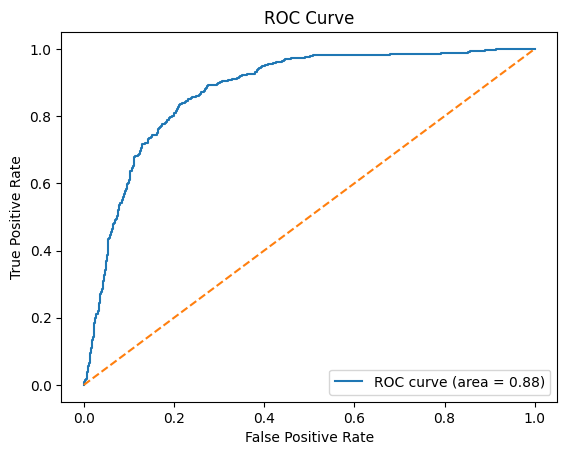

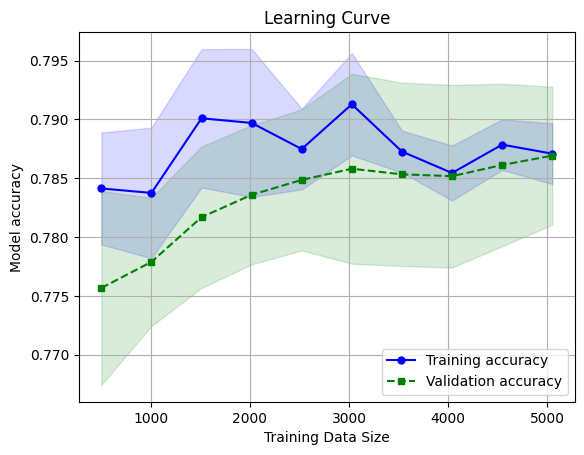

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# CSVファイルからデータを読み込む
csv_path = 'drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data3.csv'
data2 = pd.read_csv(csv_path)

# 特徴量と正解データを取得
feature_columns = [
    '年齢', '高血圧', '心臓病', '血糖値', 'BMI', '性別_Female', '性別_Male',
    '既婚_No', '既婚_Yes', '職業_Govt_job', '職業_Never_worked', '職業_Private',
    '職業_Self-employed', '住居地域_Rural', '住居地域_Urban',
    '喫煙_Unknown', '喫煙_formerly smoked', '喫煙_never smoked', '喫煙_smokes'
]
X = data2[feature_columns].values
y = data2['脳卒中'].values

# SMOTEとRandomUnderSamplerを使用したPipelineを作成
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# データをリサンプリングして分割
X_resampled, y_resampled = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# トレーニングデータとテストデータのサンプル数を表示
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

# データのスケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルを訓練
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# モデルの評価
y_pred = model.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 学習曲線の取得とプロット
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
# グリッドサーチによるハイパーパラメータの最適化
from sklearn.model_selection import GridSearchCV

# グリッドサーチで調整したいハイパーパラメータを設定
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正則化パラメータ
    'penalty': ['l1', 'l2'],  # 正則化の種類
    'solver': ['liblinear', 'saga']  # 最適化アルゴリズム
}

# ハイパーパラメータの変更
# param_grid = {
#     'C': np.logspace(-4, 4, 10),
#     'penalty': ['l2'],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'class_weight': [None, 'balanced']
# }

# GridSearchCVオブジェクトを作成
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    cv=5,  # クロスバリデーションの分割数
    n_jobs=-1,  # すべてのCPUコアを使用
    scoring='roc_auc'  # 評価指標
)

# グリッドサーチを実行
grid_search.fit(X_train_scaled, y_train)

# 最適なパラメータとそのスコアを表示
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC: {grid_search.best_score_}")

# 最適化されたモデルでテストデータを評価
optimized_model = grid_search.best_estimator_
y_pred = optimized_model.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, optimized_model.predict_proba(X_test_scaled)[:, 1])
print(f"Test ROC-AUC: {roc_auc}")


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Best ROC-AUC: 0.8632134546329915
Test ROC-AUC: 0.8756168555786877


Precision: 0.7839721254355401
Recall: 0.8522727272727273
F1 Score: 0.8166969147005445
Accuracy: 0.8079847908745247
ROC-AUC: 0.8756168555786877


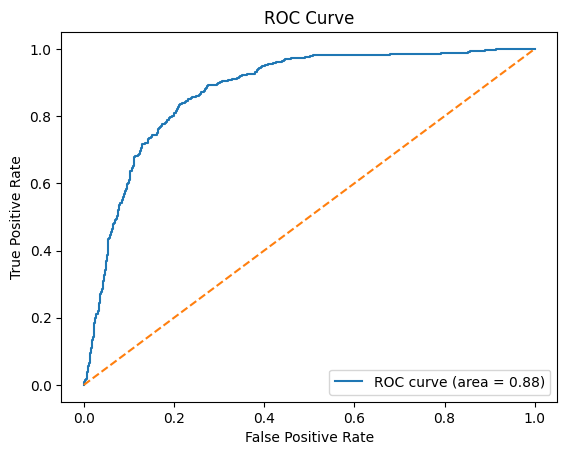

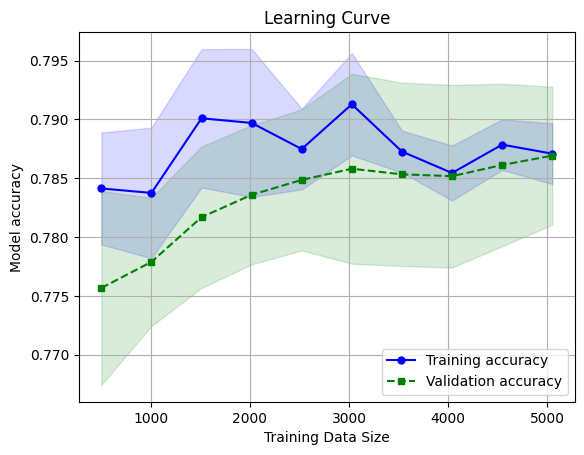

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# テストデータに対する予測を行う
y_pred = optimized_model.predict(X_test_scaled)

# 評価指標を計算
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, optimized_model.predict_proba(X_test_scaled)[:, 1])

# 評価指標を表示
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 学習曲線の取得とプロット
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 決定木のアルゴリズムによる分析


In [ ]:
#過学習が起きているかどうかの判定
